In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.sandwich_covariance as sw
import os
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
url = "https://data.cityofnewyork.us/resource/hgck-kgcn.json"
T2011 = pd.read_json(url)
T2011.head()

,_10_00_11_00am,_10_00_11_00pm,_11_00_12_00am,_11_00_12_00pm,_12_00_1_00_am,_12_00_1_00pm,_1_00_2_00am,_1_00_2_00pm,_2_00_3_00am,_2_00_3_00pm,...,_8_00_9_00pm,_9_00_10_00am,_9_00_10_00pm,date,direction,from,gis_id,id,roadway_name,to
0,68,42.0,42.0,85,20,85.0,10,94.0,11,104.0,...,74.0,52,49.0,2012-01-09,NB,UNION PLACE,15540,1,BEACH STREET,VAN DUZER STREET
1,57,42.0,35.0,67,21,73.0,16,95.0,8,102.0,...,70.0,45,63.0,2012-01-10,NB,UNION PLACE,15540,2,BEACH STREET,VAN DUZER STREET
2,67,56.0,43.0,70,27,90.0,14,89.0,6,115.0,...,68.0,71,64.0,2012-01-11,NB,UNION PLACE,15540,3,BEACH STREET,VAN DUZER STREET
3,70,64.0,43.0,60,22,105.0,7,103.0,7,71.0,...,64.0,66,58.0,2012-01-12,NB,UNION PLACE,15540,4,BEACH STREET,VAN DUZER STREET
4,83,55.0,54.0,89,31,88.0,17,113.0,7,113.0,...,58.0,64,58.0,2012-01-13,NB,UNION PLACE,15540,5,BEACH STREET,VAN DUZER STREET


In [4]:
!curl https://data.cityofnewyork.us/api/views/wng2-85mv/rows.csv?accessType=DOWNLOAD > T2011.csv
!mv T2011.csv $PUIDATA
T2011 = pd.read_csv("%s/T2011.csv"%os.getenv("PUIDATA")) 
T2011.head(7)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  495k    0  495k    0     0   875k      0 --:--:-- --:--:-- --:--:--  876k


,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20,10,11,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21,16,8,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27,14,6,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22,7,7,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31,17,7,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0
5,6,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/14/2012,42,27,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,SB,01/09/2012,27,12,12,...,165.0,197.0,152.0,174.0,128.0,95.0,87.0,73.0,57.0,42.0


In [5]:
!curl https://data.cityofnewyork.us/api/views/p424-amsu/rows.csv?accessType=DOWNLOAD > T2012.csv
!mv T2012.csv $PUIDATA
T2012 = pd.read_csv("%s/T2012.csv"%os.getenv("PUIDATA"))
T2012.head(7)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  907k    0  907k    0     0   947k      0 --:--:-- --:--:-- --:--:--  947k  0  655k    0     0   816k      0 --:--:-- --:--:-- --:--:--  816k


,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154


In [6]:
T2011L = T2011[T2011["Roadway Name"].str.contains("LITTLE CLOVE ROAD", case=False)]
T2012L = T2012[T2012["Roadway Name"].str.contains("LITTLE CLOVE ROAD", case=False)]

In [12]:
T2011L

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
12,13,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/09/2012,21,11,2,...,281.0,251.0,218.0,219.0,175.0,150.0,102.0,77.0,49.0,36.0
13,14,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/10/2012,20,14,5,...,292.0,266.0,223.0,271.0,160.0,137.0,116.0,91.0,58.0,32.0
14,15,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/11/2012,16,11,3,...,296.0,242.0,206.0,220.0,189.0,130.0,98.0,89.0,57.0,38.0
15,16,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/12/2012,26,14,7,...,291.0,284.0,222.0,229.0,158.0,127.0,104.0,98.0,68.0,46.0
16,17,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/13/2012,29,11,10,...,258.0,224.0,225.0,202.0,156.0,131.0,88.0,88.0,59.0,64.0
17,18,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/14/2012,32,31,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/09/2012,18,7,7,...,280.0,326.0,496.0,301.0,182.0,172.0,77.0,73.0,38.0,21.0
19,20,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/10/2012,21,10,9,...,296.0,452.0,335.0,289.0,198.0,155.0,100.0,94.0,47.0,41.0
20,21,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/11/2012,19,12,6,...,278.0,424.0,336.0,308.0,235.0,152.0,84.0,54.0,44.0,33.0
21,22,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/12/2012,32,9,4,...,272.0,449.0,444.0,368.0,198.0,141.0,91.0,83.0,70.0,37.0


In [13]:
T2012L

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
4486,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,09/28/2012,82,36,36.0,...,420,264,309,337,373,328,272,187,172,145
4487,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,09/29/2012,126,75,48.0,...,416,384,427,408,303,278,256,195,212,170
4488,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,09/30/2012,157,98,74.0,...,355,323,275,257,206,209,212,117,122,90
4489,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/01/2012,61,31,20.0,...,365,342,306,346,332,290,267,230,147,98
4490,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/02/2012,65,31,14.0,...,346,272,330,337,324,338,250,217,134,95
4491,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/03/2012,66,26,20.0,...,302,266,340,304,358,367,292,215,155,111
4492,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/04/2012,64,42,25.0,...,390,360,367,354,342,326,257,219,193,115
4493,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/05/2012,75,33,42.0,...,414,262,154,192,363,349,268,174,193,158
4494,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/06/2012,109,77,59.0,...,395,364,310,287,202,232,178,164,192,149
4495,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/07/2012,94,65,51.0,...,289,258,273,222,199,217,151,145,99,90


In [15]:
T2012L.columns

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [17]:
T2012L.drop(['ID', 'Segment ID', 'From', 'To', 'Direction',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'], axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
T2012L

,Roadway Name,Date,2:00-3:00PM
4486,LITTLE CLOVE ROAD,09/28/2012,420
4487,LITTLE CLOVE ROAD,09/29/2012,416
4488,LITTLE CLOVE ROAD,09/30/2012,355
4489,LITTLE CLOVE ROAD,10/01/2012,365
4490,LITTLE CLOVE ROAD,10/02/2012,346
4491,LITTLE CLOVE ROAD,10/03/2012,302
4492,LITTLE CLOVE ROAD,10/04/2012,390
4493,LITTLE CLOVE ROAD,10/05/2012,414
4494,LITTLE CLOVE ROAD,10/06/2012,395
4495,LITTLE CLOVE ROAD,10/07/2012,289


In [19]:
T2012L['Date'] = pd.to_datetime(T2012['Date'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
T2012L

,Roadway Name,Date,2:00-3:00PM
4486,LITTLE CLOVE ROAD,2012-09-28,420
4487,LITTLE CLOVE ROAD,2012-09-29,416
4488,LITTLE CLOVE ROAD,2012-09-30,355
4489,LITTLE CLOVE ROAD,2012-10-01,365
4490,LITTLE CLOVE ROAD,2012-10-02,346
4491,LITTLE CLOVE ROAD,2012-10-03,302
4492,LITTLE CLOVE ROAD,2012-10-04,390
4493,LITTLE CLOVE ROAD,2012-10-05,414
4494,LITTLE CLOVE ROAD,2012-10-06,395
4495,LITTLE CLOVE ROAD,2012-10-07,289


In [21]:
T2012L["Date"] = T2012L["Date"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,1,'Plot of Traffic Amount on Little Clove Road between the hours of 2 and 3 PM')

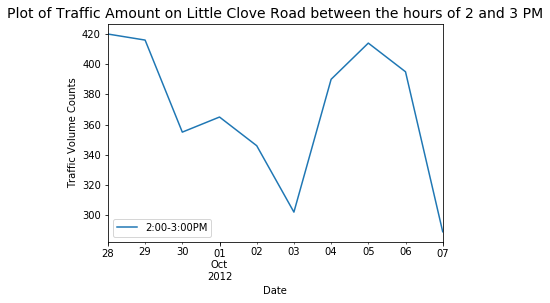

In [25]:
Cloveplot = T2012L.plot(x='Date', y='2:00-3:00PM');
Cloveplot.set_ylabel("Traffic Volume Counts");
plt.title(r'Plot of Traffic Amount on Little Clove Road between the hours of 2 and 3 PM', fontsize = 14)